<a href="https://colab.research.google.com/github/pcw11/2025-1-myclass-BDA/blob/main/inclass/09w_A_mon_0512_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 9주차 수업

## 결측값 제거

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [4]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [5]:
df.dropna(axis=1)

""
0
1
2
3
4


In [6]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [7]:
df.dropna(subset=['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [8]:
df.dropna(subset=['score'], axis=0)

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [9]:
df.dropna(subset=['score'], axis=1)

KeyError: ['score']

In [10]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [11]:
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [12]:
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [13]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [14]:
df.score.mean()

np.float64(4.0)

In [15]:
df['score'].sum()

np.float64(16.0)

In [16]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [17]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [np.nan, pd.Timestamp("1940-04-25"),
                             pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [18]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [19]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [20]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [21]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [22]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [23]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [24]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [25]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [26]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [27]:
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [28]:
df.dropna(subset=['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [29]:
df.dropna(subset=['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


## 데이터프레임이 빈 것 확인 : 속성 df.empty

In [30]:
df1 = pd.DataFrame()
df1

""


In [31]:
df1.empty

True

In [32]:
df1 = pd.DataFrame(index= ['row1', 'row2', 'row3'])
df1

""
row1
row2
row3


In [33]:
df1.empty

True

In [34]:
df2 = pd.DataFrame(columns= ['col1', 'col2', 'col3'])
df2

,col1,col2,col3


In [35]:
df2.empty

True

In [36]:
df3 = pd.DataFrame(index= ['row1', 'row2', 'row3'], columns= ['col1', 'col2', 'col3'])
df3

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [37]:
df3.empty

False

In [38]:
df4 = pd.DataFrame(np.nan,
                   index   = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df4

,col1,col2,col3
row1,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [39]:
df4.empty

False

In [40]:
df5 = pd.DataFrame(2,
                   index   = ['row1', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df5

,col1,col2,col3
row1,2,2,2
row2,2,2,2
row3,2,2,2


In [41]:
df5.empty

False

## 결측 값 대체

In [42]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (33/33), 2.17 MiB | 3.79 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [43]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [44]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [45]:
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


## 결측값 채워넣기 fillna()

In [46]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [47]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [48]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [49]:
pd.set_option('display.precision', 2)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [50]:
exam.math.isna().sum()

np.int64(0)

In [51]:
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [52]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [53]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [54]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [55]:
df['score'].value_counts()

,count
score,
4,2
5,1
3,1
2,1
6,1


In [56]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [57]:
df['score'].value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [58]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [59]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [60]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [61]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [62]:
df.dropna(subset = ['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [63]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [64]:
df = pd.DataFrame([1])
df

,0
0,1


In [65]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [66]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [67]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [68]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [69]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', None)
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [70]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      2 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [72]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [ ]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

In [73]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [74]:
df = df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [76]:
type(df.loc[2, 'x2'])

str

In [77]:
type(df.loc[0, 'x2'])

str

# 이상값(outlier) 알아보기

In [78]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
114,hyundai,sonata,3.3,2008,6,auto(l5),f,19,28,r,midsize
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
199,toyota,land cruiser wagon 4wd,5.7,2008,8,auto(s6),4,13,18,r,suv
148,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize
174,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv


In [79]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.00,234.00,234.00,234.00,234.00
mean,3.47,2003.50,5.89,16.86,23.44
std,1.29,4.51,1.61,4.26,5.95
min,1.60,1999.00,4.00,9.00,12.00
25%,2.40,1999.00,4.00,14.00,18.00
50%,3.30,2003.50,6.00,17.00,24.00
75%,4.60,2008.00,8.00,19.00,27.00
max,7.00,2008.00,8.00,35.00,44.00


In [80]:
%config InlineBackend.figure_format = 'retina'

In [81]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


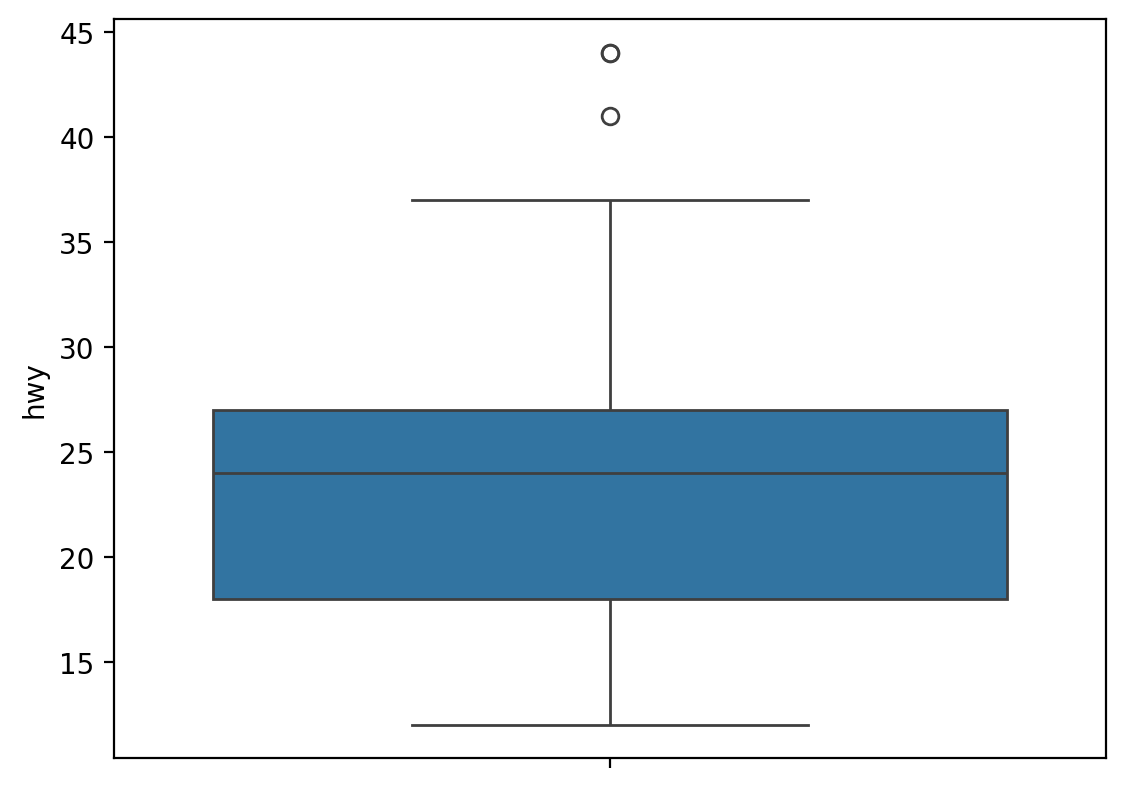

In [82]:
# 시험에 반드시 나옴
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy');

### 박스상자의 구성요소
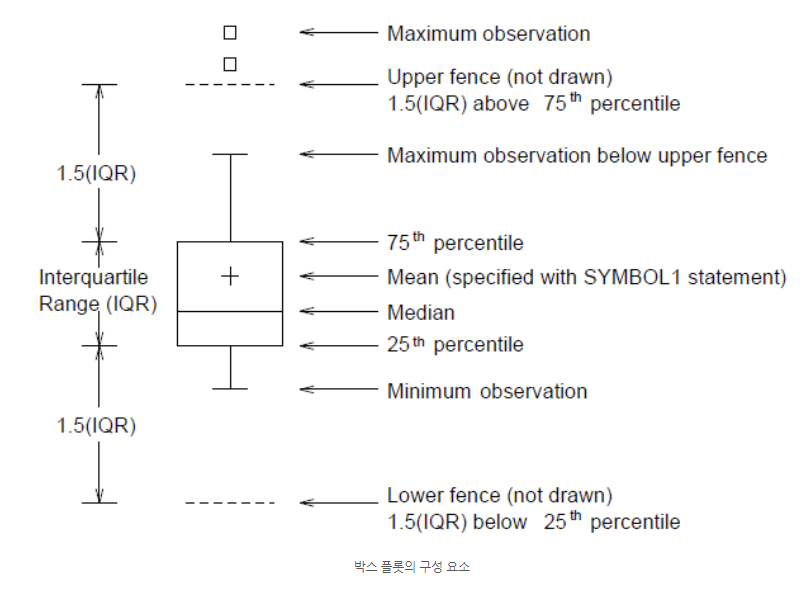

In [83]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [84]:
s.quantile()

np.float64(3.0)

In [85]:
s.quantile(.5)

np.float64(3.0)

In [86]:
s.quantile([.1, .2, .25, .5, .75])

,0
0.10,1.4
0.20,1.8
0.25,2.0
0.50,3.0
0.75,4.0


In [87]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [88]:
mpg.hwy.quantile([.25, .5, .75])

,hwy
0.25,18.0
0.50,24.0
0.75,27.0


In [89]:
a, b = [10, 20]

In [90]:
a

10

In [91]:
b

20

In [92]:
p25, p50, p75 = mpg.hwy.quantile([.25, .5, .75])

In [93]:
p25

18.0

In [94]:
p50

24.0

In [95]:
p75

27.0

In [96]:
iqr = p75 - p25
iqr

9.0

In [97]:
## upper fence
UF = p75 + 1.5 * iqr
UF

40.5

In [98]:
## lower fence
LF = p25 - 1.5 * iqr
LF

4.5

In [99]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [100]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [101]:
mpg[ mpg.hwy > UF ][['hwy']]

,hwy
212,44
221,44
222,41


In [102]:
mpg[ mpg.hwy > UF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [103]:
mpg[ mpg.hwy < LF ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [104]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [105]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [106]:
mpg[ (mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [107]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [108]:
mpg['hwy'] = np.where((mpg.hwy < LF) | (mpg.hwy > UF), np.nan, mpg['hwy'])
mpg.hwy.isna().sum()

np.int64(3)

In [109]:
mpg[ mpg.hwy.isna() ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [110]:
len(mpg)

234

In [111]:
dmpg = mpg.dropna(subset=['hwy'])
len(dmpg)

231

In [112]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [113]:
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,27.73
r,21.00


In [114]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [115]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [116]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ] ['hwy']

,hwy
212,44
221,44
222,41


## 7장 종료

## 8장 그래프

In [1]:
!pip install koreanize_matplotlib

In [118]:
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
plt.rcParams.update({'figure.dpi' : '100'})
plt.rcParams.update({'figure.figsize' : [4, 2.5]})

In [7]:
mpg = pd.read_csv('data/mpg.csv')

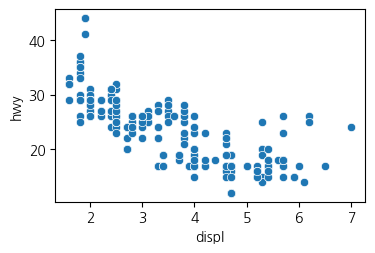

In [8]:
import koreanize_matplotlib

sns.scatterplot(data=mpg, x='displ', y='hwy');

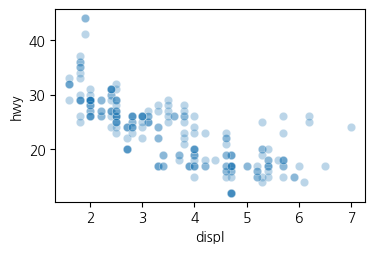

In [9]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3);

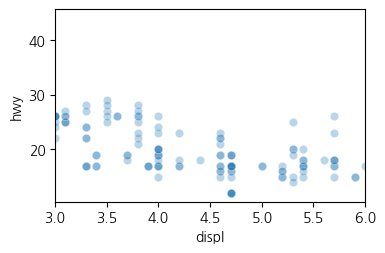

In [10]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3, 6]);

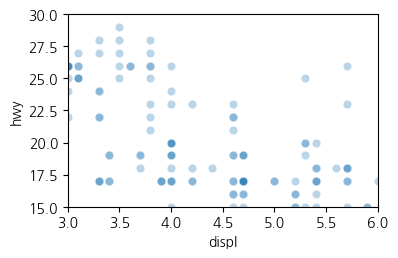

In [11]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3, 6], ylim=[15, 30]);

<Axes: xlabel='displ', ylabel='hwy'>

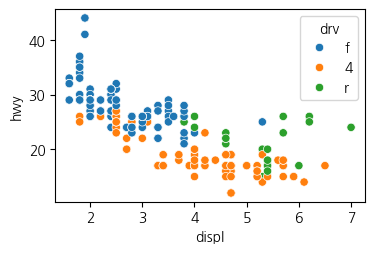

In [12]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

| `loc` 값 | 위치                       |
| ------- | ------------------------ |
| `0`     | 최적의 위치 (기본값, "best")     |
| `1`     | 오른쪽 위 ("upper right")    |
| `2`     | 왼쪽 위 ("upper left")      |
| `3`     | 왼쪽 아래 ("lower left")     |
| `4`     | 오른쪽 아래 ("lower right")   |
| `5`     | 가운데 ("center")           |
| `6`     | 왼쪽 가운데 ("center left")   |
| `7`     | 오른쪽 가운데 ("center right") |
| `8`     | 아래 가운데 ("lower center")  |
| `9`     | 위 가운데 ("upper center")   |
| `10`    | 그래프 중앙 ("center")        |


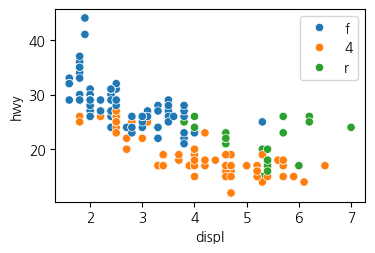

In [13]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')
plt.legend(loc='upper right');

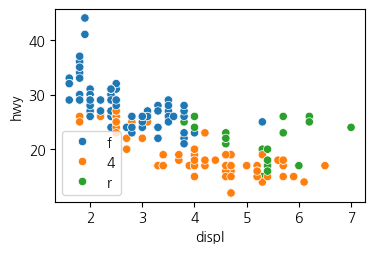

In [14]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')
plt.legend(loc=3);

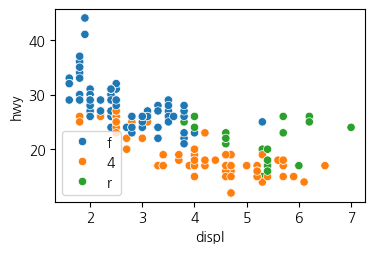

In [15]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')
plt.legend(loc='lower left');

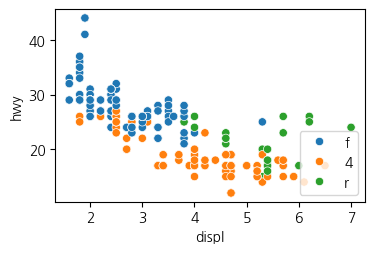

In [16]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')
plt.legend(loc=4);

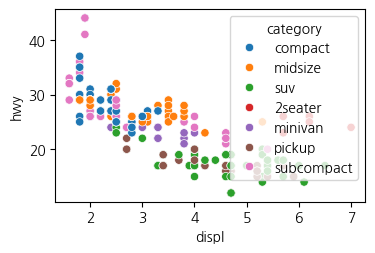

In [17]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category');

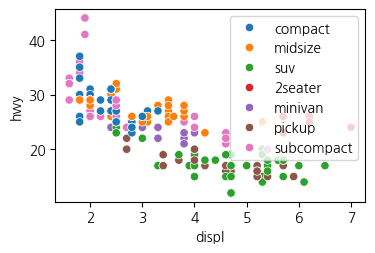

In [18]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category');
plt.legend(loc='upper right');

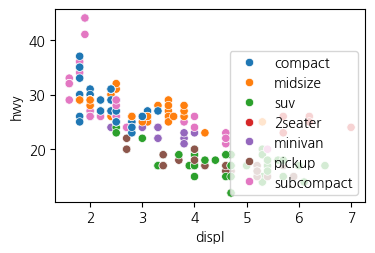

In [19]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category');
plt.legend(loc='lower right');

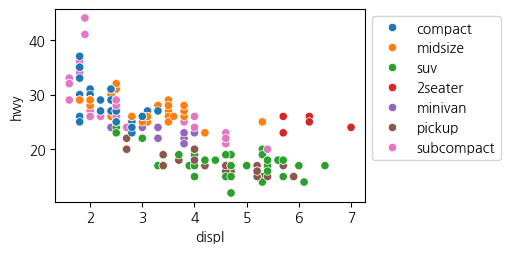

In [20]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category');
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

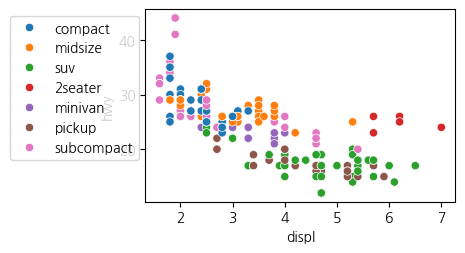

In [21]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category');
plt.legend(loc='upper right', bbox_to_anchor=(0, 1));

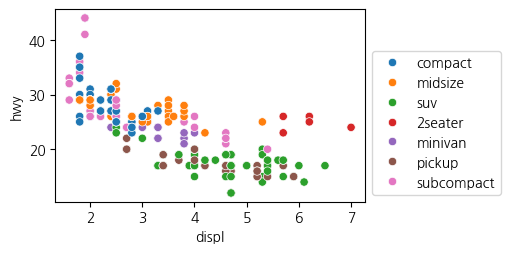

In [22]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'category');
plt.legend(loc='lower left', bbox_to_anchor=(1, 0));

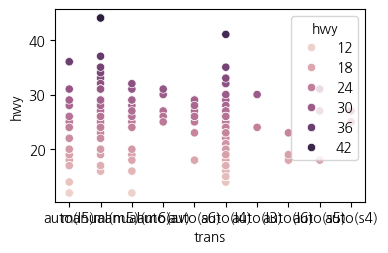

In [23]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');

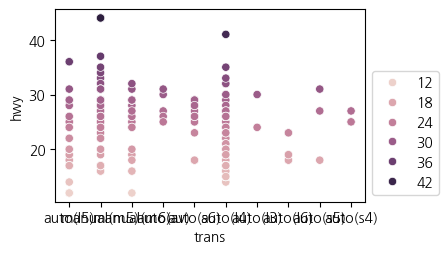

In [24]:
sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
plt.legend(loc='lower left', bbox_to_anchor=(1, 0));

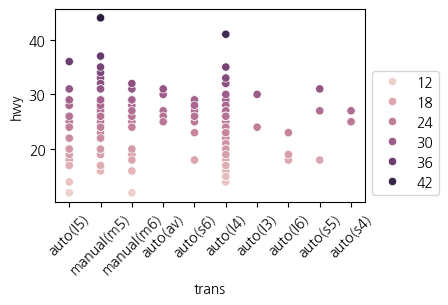

In [25]:
myPlot = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
myPlot.tick_params(axis='x', labelrotation=45);
myPlot.legend(loc='lower left', bbox_to_anchor=(1, 0));

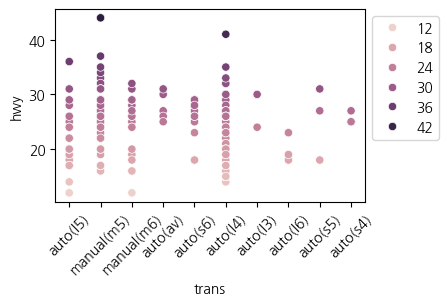

In [26]:
myPlot = sns.scatterplot(data = mpg, x = 'trans', y = 'hwy', hue = 'hwy');
myPlot.tick_params(axis='x', labelrotation=45);
myPlot.legend(loc='upper left', bbox_to_anchor=(1, 1));

In [27]:
df_mpg = mpg.groupby('drv').agg(mean_hwy=('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [28]:
df_mpg = mpg.groupby('drv', as_index=False).agg(mean_hwy=('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


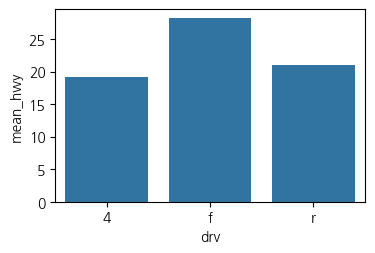

In [29]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy');

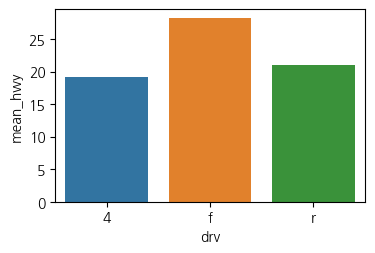

In [30]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv');

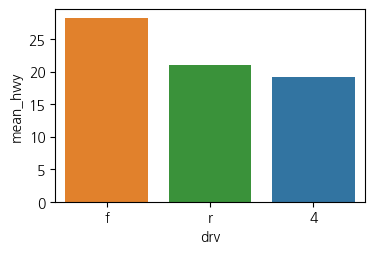

In [31]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv', order=['f', 'r', '4']);

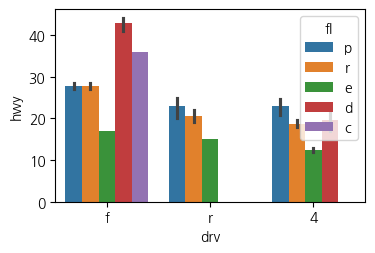

In [32]:
sns.barplot(data=mpg, x='drv', y='hwy', hue='fl', order=['f', 'r', '4']);

In [33]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [34]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns={'model':'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [35]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [36]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv', 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


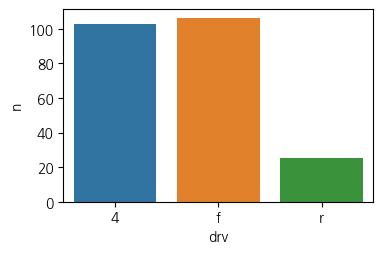

In [37]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv');

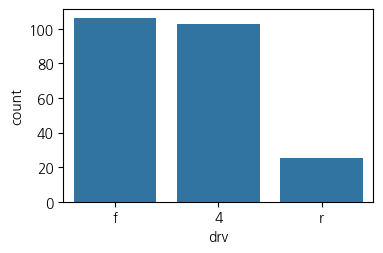

In [38]:
sns.countplot(data=mpg, x='drv');

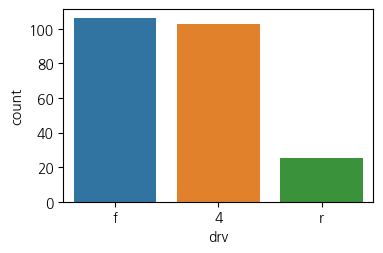

In [39]:
sns.countplot(data=mpg, x='drv', hue='drv');

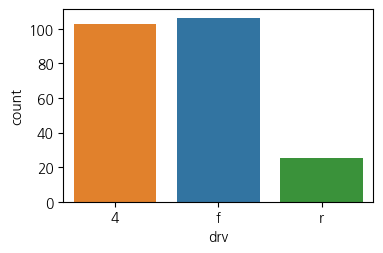

In [40]:
sns.countplot(data=mpg, x='drv', hue='drv', order=['4', 'f', 'r']);